In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ISE

/content/drive/MyDrive/ISE


In [ ]:
!nvidia-smi

Tue May 25 05:33:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model

In [ ]:
!pip install annoy
from annoy import AnnoyIndex

#Read dataset and store in numpy array form

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
dataset_generator = datagen.flow_from_directory(
    directory="./dataset",
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='sparse',
)
fp=dataset_generator.filepaths

Found 1597 images belonging to 32 classes.


In [ ]:
# X=[]
# y=[]
# fp=dataset_generator.filepaths
# k=0
# for data, labels in dataset_generator:
#   X.append(data[0])
#   y.append(labels[0])
#   k=k+1
#   if(k%100==0):
#     print(k/100,end=" ,")
#   if(k==1597):
#     break

In [ ]:
# X=np.array(X)
# y=np.array(y)

In [ ]:
# np.save('./final/Xdat', X)
# np.save('./final/ydat', y)

##Loading the dataset

In [ ]:
X=np.load('./final/Xdat.npy')
y=np.load('./final/ydat.npy')

In [ ]:
dataset_generator.class_indices

{'aeroplane': 0,
 'bear': 1,
 'beer_mug': 2,
 'bicycle': 3,
 'bird': 4,
 'birdbath': 5,
 'boat': 6,
 'bottle': 7,
 'bulldozer': 8,
 'bus': 9,
 'butterfly': 10,
 'cactus': 11,
 'camel': 12,
 'car': 13,
 'cat': 14,
 'chair': 15,
 'comet': 16,
 'cow': 17,
 'dining_table': 18,
 'dog': 19,
 'goat': 20,
 'goldfish': 21,
 'horse': 22,
 'motorbike': 23,
 'person': 24,
 'potted_plant': 25,
 'sheep': 26,
 'sofa': 27,
 'train': 28,
 'tv_monitor': 29,
 'waterfall': 30,
 'zebra': 31}

In [ ]:
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (1597, 224, 224, 3)
Shape of y :  (1597,)


#Reading and storing unseen Label dataset

In [ ]:
unseenLabelDataset_generator = datagen.flow_from_directory(
    directory="./test dataset",
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='sparse',
)

Found 50 images belonging to 5 classes.


In [ ]:
t_fp=unseenLabelDataset_generator.filepaths

In [ ]:
unseenLabelDataset_generator.class_indices

{'dolphin': 0, 'elephant': 1, 'flower': 2, 'laptop': 3, 'teapot': 4}

In [ ]:
# t_X=[]
# t_y=[]
# k=0
# for data, labels in unseenLabelDataset_generator:
#   t_X.append(data[0])
#   t_y.append(labels[0])
#   k=k+1
#   if(k==50):
#     break

In [ ]:
# t_X=np.array(t_X)
# t_y=np.array(t_y)

In [ ]:
# np.save('./final/t_Xdat', t_X)
# np.save('./final/t_ydat', t_y)

##Loading the unseen label dataset

In [ ]:
t_X=np.load('./final/t_Xdat.npy')
t_y=np.load('./final/t_ydat.npy')

#Loading VGG16mmodel with trained weights.

In [ ]:
model = VGG16( weights='imagenet',include_top=True)
print(model.summary())

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

#Model for Image to Image Search

In [ ]:
for layer in model.layers:
 layer.trainable = False
model2 = Model(inputs=model.input,outputs=model.get_layer('fc2').output)

In [ ]:
print(model2.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
image_embeddings=model2.predict(X)

##Index Image embeddings-

In [ ]:
image_index = AnnoyIndex(4096, metric='angular')
for i, row in enumerate(image_embeddings):
  vec = row
  image_index.add_item(i, vec)
image_index.build(1000)

True

##Already Indexed Images

In [ ]:
def image_to_image_search(img_embed,img_path):
  distances = image_index.get_nns_by_vector(img_embed,8, include_distances=True)
  print("Search image: ")
  from IPython.display import Image, display
  display(Image(img_path))
  import cv2
  from matplotlib import pyplot as plt
  print("Similar images-")
  fig = plt.figure(figsize=(24, 10))
  fig.tight_layout()
  rows = 2
  columns = 4
  k=1
  for i in distances[0]:
    Image4 = cv2.imread(fp[i])
    fig.add_subplot(rows, columns, k)
    image = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
    plt.imshow(image,aspect="auto")
    plt.axis('off')
    k=k+1
  plt.subplots_adjust( wspace=0.01, hspace=0.01)

Search image: 


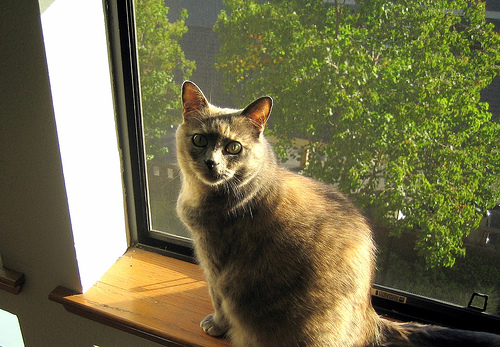

Similar images-


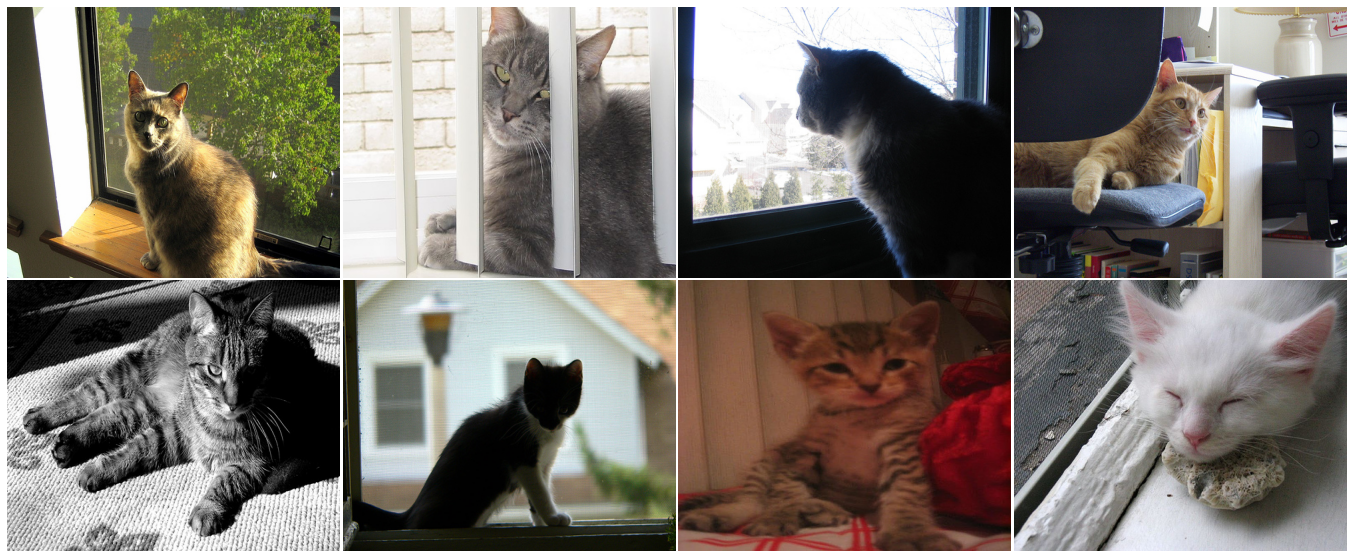

In [ ]:
image_to_image_search(image_embeddings[701],fp[701])

Search image: 


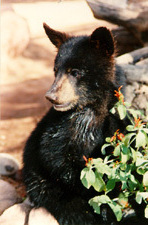

Similar images-


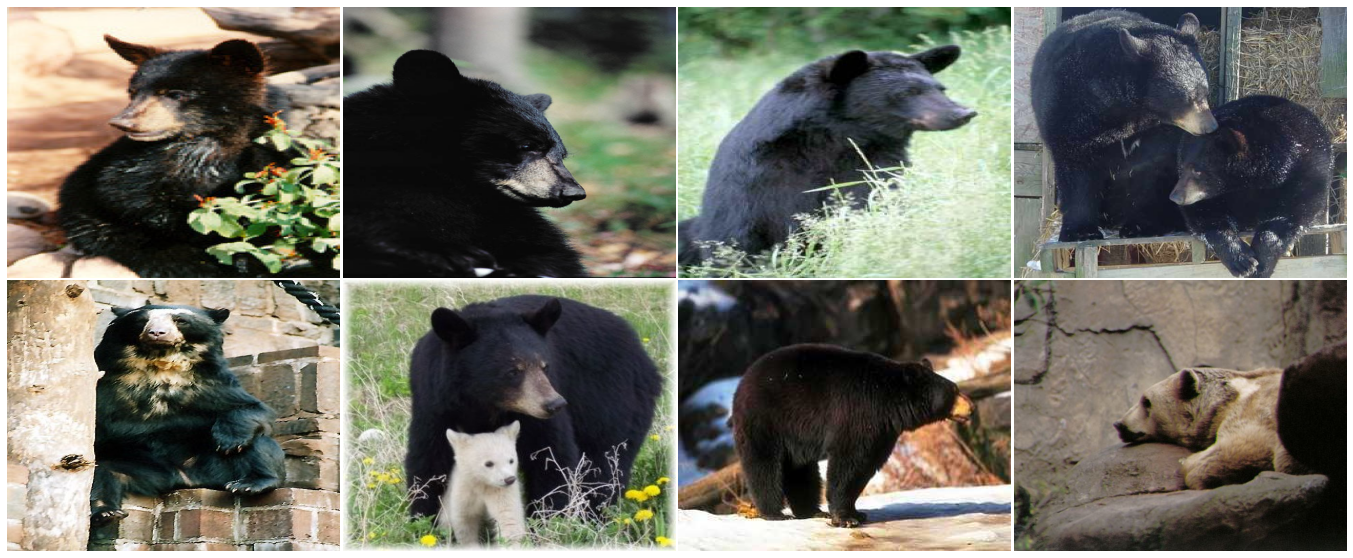

In [ ]:
image_to_image_search(image_embeddings[51],fp[51])

##Unseen Images

In [ ]:
t_image_embeddings=model2.predict(t_X)

In [ ]:
image_to_image_search(t_image_embeddings[17],t_fp[17])

#Index Word Embeddings

In [ ]:
word_embeddings = {}
from annoy import AnnoyIndex
word_index = AnnoyIndex(300, metric='angular')
f = open('./glove/glove.6B.300d.txt', encoding='utf-8')
words_list=[]
k=0
for line in f:
    values = line.split()
    word = values[0]
    words_list.append(word)
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
    word_index.add_item(k,coefs)
    k+=1
f.close()
word_index.build(10)
print('Found %s word vectors.' % len(word_embeddings))

Found 400000 word vectors.


In [ ]:
custom_targets=[]
for k in dataset_generator.class_indices:
  splits = k.split("_")
  vectors = np.array([word_embeddings[split] if split in word_embeddings else np.zeros(shape=300) for split in splits])
  class_vector = np.mean(vectors, axis=0)
  # print(splits," = ",class_vector)
  custom_targets.append(class_vector)

#Model for Word to Image Search

In [ ]:
from tensorflow.keras import layers
x = model.get_layer('fc2').output
image_dense1 = layers.Dense(2000, name="image_dense1")(x)
image_dense1 = layers.Activation("relu")(image_dense1)
image_dense1 = layers.BatchNormalization()(image_dense1)
image_dense1 = layers.Dropout(0.4)(image_dense1)
image_dense2 = layers.Dense(300, name="image_dense2")(image_dense1)
image_output = layers.BatchNormalization()(image_dense2)
complete_model = Model(inputs=[model2.input], outputs=image_output)

In [ ]:
complete_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

##Splitting data into Training and Test(or Valdidation)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
dX_train, dX_test, dy_train, dy_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [ ]:
yw_train=[]
for i in dy_train:
  yw_train.append(custom_targets[int(i)])

In [ ]:
yw_test=[]
for i in dy_test:
  yw_test.append(custom_targets[int(i)])

In [ ]:
yw_test=np.array(yw_test)
yw_train=np.array(yw_train)

In [ ]:
print("Shape of new y : ",yw_train.shape)

Shape of new y :  (1277, 300)


In [ ]:
# sgd = tf.keras.optimizers.SGD(lr=0.04, decay=1e-6, momentum=0.9, nesterov=True)
# complete_model.compile(optimizer='sgd', loss=tf.keras.losses.CosineSimilarity(reduction=tf.keras.losses.Reduction.SUM))

In [ ]:
# history=complete_model.fit(dX_train,yw_train,epochs=60,batch_size=32,validation_batch_size=32,validation_data=(dX_test,yw_test))

Epoch 1/60
40/40 [==============================] - 8s 185ms/step - loss: -4.4142 - val_loss: -12.5372
Epoch 2/60
40/40 [==============================] - 7s 186ms/step - loss: -14.0098 - val_loss: -15.8490
Epoch 3/60
40/40 [==============================] - 8s 193ms/step - loss: -16.9945 - val_loss: -17.7463
Epoch 4/60
40/40 [==============================] - 8s 197ms/step - loss: -18.6919 - val_loss: -19.1257
Epoch 5/60
40/40 [==============================] - 8s 192ms/step - loss: -19.8766 - val_loss: -20.1324
Epoch 6/60
40/40 [==============================] - 7s 187ms/step - loss: -20.7834 - val_loss: -20.9039
Epoch 7/60
40/40 [==============================] - 7s 183ms/step - loss: -21.4634 - val_loss: -21.4787
Epoch 8/60
40/40 [==============================] - 7s 181ms/step - loss: -22.3192 - val_loss: -21.9438
Epoch 9/60
40/40 [==============================] - 7s 180ms/step - loss: -23.0453 - val_loss: -22.3189
Epoch 10/60
40/40 [==============================] - 7s 180ms/ste

##Saving the Model and its history of loss

In [ ]:
# import pickle
# with open('./fitted-model/trainHistoryDict', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)
# complete_model.save('./fittedodel/complete_model')

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

##Loading the Saved Model and history 

In [ ]:
from tensorflow import keras
import pickle
complete_model = keras.models.load_model('./fitted-model/complete_model')
history=pickle.load(open('./fitted-model/trainHistoryDict', "rb"))

In [ ]:
loss = history['loss']
val_loss = history['val_loss']

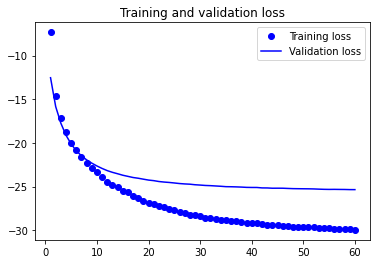

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
y_train_pred=complete_model.predict(dX_train)

##“flat” hit@k 

In [ ]:
def flatk(y,y_pred):
  ans=0
  rem=0
  # print("Shape ",y.shape, y_pred.shape)
  for i in range(len(y_pred)):
    tar=''
    for e in dataset_generator.class_indices:
      if(dataset_generator.class_indices[e]==y[i]):
        tar=e
        break;
    # print(tar,end=" -> ")
    arr_tar=tar.split('_')
    distances = word_index.get_nns_by_vector(y_pred[i], 3, include_distances=True)
    for e in distances[0]:
      if (words_list[e] in arr_tar):
        ans=ans+1
    #     arr_tar.remove(words_list[e])
    # if (len(arr_tar)==0):
    #   ans=ans+1
      # print(words_list[e],end=" , ")
    # print()
  return ans

In [ ]:
fk=flatk(dy_train,y_train_pred)
print("Correctly predicted labels for",fk,"out of",dy_train.shape[0],"training images.")
print('Accuracy on training set', fk/dy_train.shape[0]*100)

Correctly predicted labels for 1230 out of 1277 training images.
Accuracy on training set 96.31949882537197


In [ ]:
y_test_pred=complete_model.predict(dX_test)

In [ ]:
fk=flatk(dy_test,y_test_pred)
print("Correctly predicted labels for",fk,"out of",dy_test.shape[0],"testing images.")
print('Accuracy on testing set', fk/dy_test.shape[0]*100)

Correctly predicted labels for 200 out of 320 testing images.
Accuracy on testing set 62.5


In [ ]:
y_pred=complete_model.predict(X)

In [ ]:
from annoy import AnnoyIndex
image_word_index = AnnoyIndex(300, metric='angular')
for i in range(len(y_pred)):
  vec = y_pred[i]
  image_word_index.add_item(i, vec)
image_word_index.build(1000)

True

##Word to Image Search Examples

In [ ]:
def word_to_image_search(word):
  distances = image_word_index.get_nns_by_vector(word_embeddings[word],16, include_distances=True)
  import cv2
  from matplotlib import pyplot as plt
  fig = plt.figure(figsize=(32, 20))
  fig.tight_layout()
  rows = 4
  columns = 4
  k=1
  for i in distances[0]:
    Image4 = cv2.imread(fp[i])
    fig.add_subplot(rows, columns, k)
    image = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)
    plt.imshow(image,aspect="auto")
    plt.axis('off')
    k=k+1
  plt.subplots_adjust( wspace=0.01, hspace=0.01)

In [ ]:
word_to_image_search('ocean')

In [ ]:
word_to_image_search('mountains')

##Zero Shot Learning

In [ ]:
t_y_pred=complete_model.predict(t_X)

### Generating tags for unseen label images

In [ ]:
from IPython.display import Image, display
def generate_tags(y,y_pred):
  ans=0
  rem=0
  print("Shape ",y.shape, y_pred.shape)
  for i in range(len(y_pred)):
    tar=''
    for e in unseenLabelDataset_generator.class_indices:
      if(unseenLabelDataset_generator.class_indices[e]==y[i]):
        tar=e
        break;
    display(Image(t_fp[i],width = 200, height = 100))
    print(tar,end=" -> ")
    arr_tar=tar.split('_')
    distances = word_index.get_nns_by_vector(y_pred[i], 10, include_distances=True)
    for e in distances[0]:
      if (words_list[e] in arr_tar):
        ans=ans+1
    #     arr_tar.remove(words_list[e])
    # if (len(arr_tar)==0):
    #   ans=ans+1
      print(words_list[e],end=" , ")
    print()
  return ans

Shape  (50,) (50, 300)


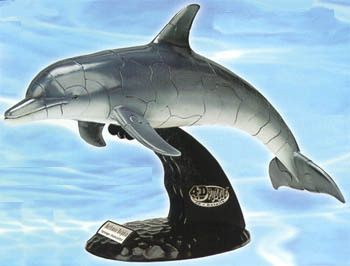

dolphin -> biplane , sailboat , pony , pigeon , reptile , tractor , dolphin , cuckoo , goose , crocodiles , 


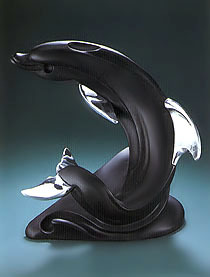

dolphin -> fish , bottle , eaten , chicken , eating , duck , stuffed , yellow , dish , spray , 


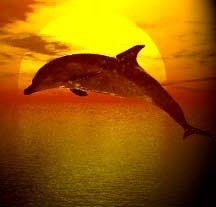

dolphin -> bird , cat , birds , dog , cats , humans , animals , creature , spotted , dinosaurs , 


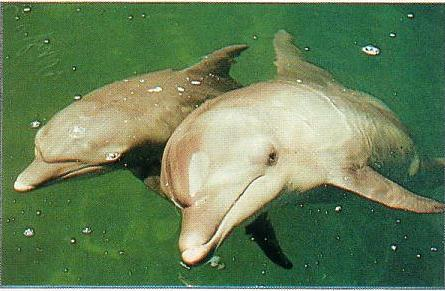

dolphin -> stray , reindeer , cheeses , elephants , snakes , olives , whale , stallion , shark , beasts , 


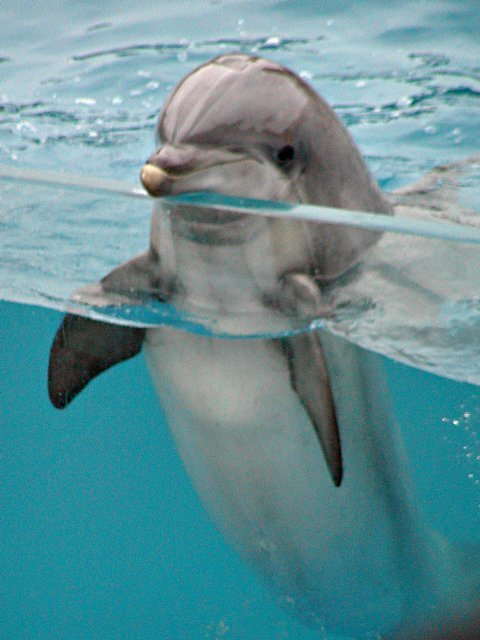

dolphin -> boat , bird , whale , dog , shark , horse , horses , dolphin , dogs , elephant , 


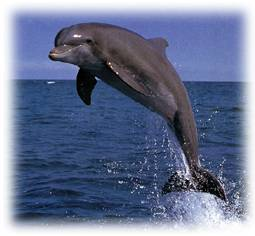

dolphin -> bird , cow , birds , animals , elephant , dog , wild , cat , deer , horse , 


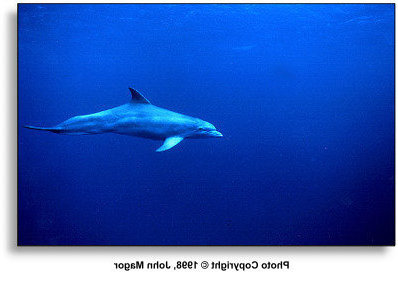

dolphin -> goat , trout , crackers , chicken , cheese , cheeses , crab , tuna , cookies , salty , 


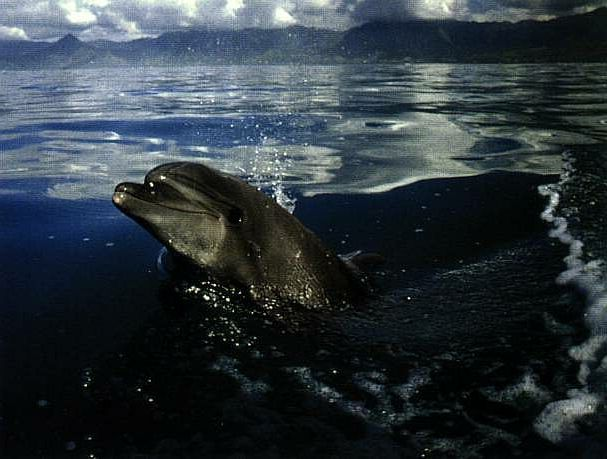

dolphin -> dog , horse , cat , dogs , cow , shark , whale , horses , spotted , elephant , 


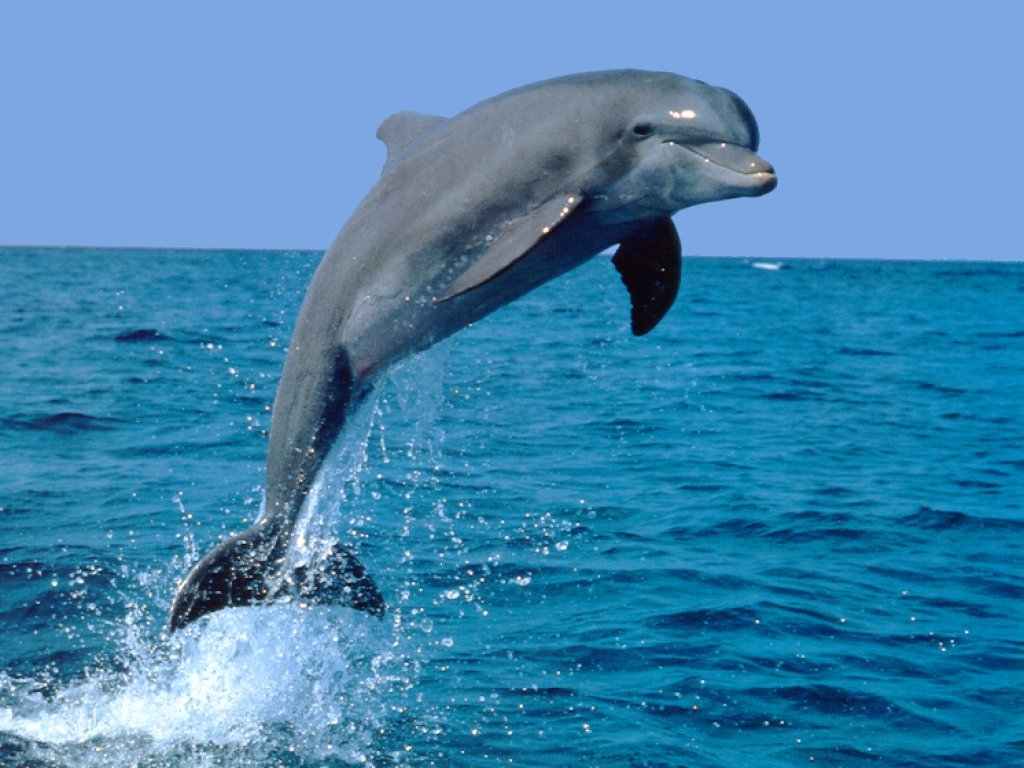

dolphin -> boat , whale , shark , dolphin , bird , dog , elephant , caught , horses , catch , 


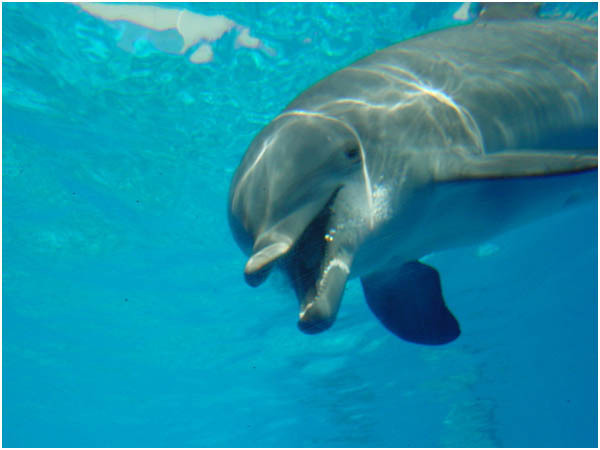

dolphin -> stray , shark , alligator , whale , reindeer , snakes , creature , creatures , elephants , sightings , 


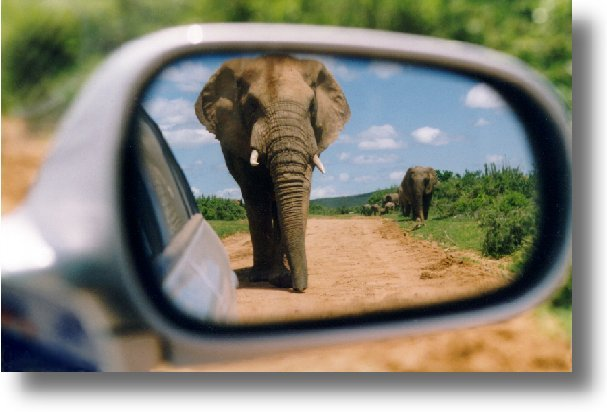

elephant -> truck , bus , taxi , rail , passenger , greyhound , buses , trucks , terminal , luggage , 


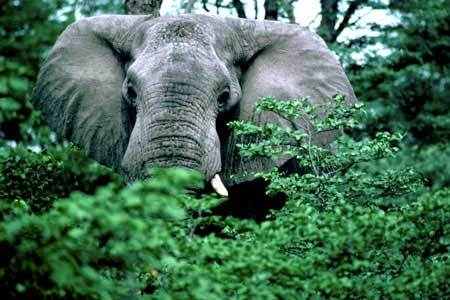

elephant -> horse , horses , cat , sheep , elephant , deer , dog , animals , rabbit , cats , 


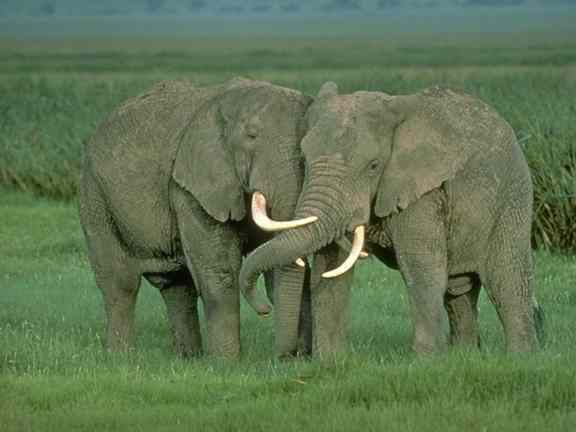

elephant -> horse , horses , sheep , cow , dog , herd , cat , elephant , animals , thoroughbred , 


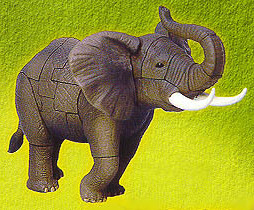

elephant -> horse , horses , cat , sheep , animals , cow , dog , cats , thoroughbred , elephant , 


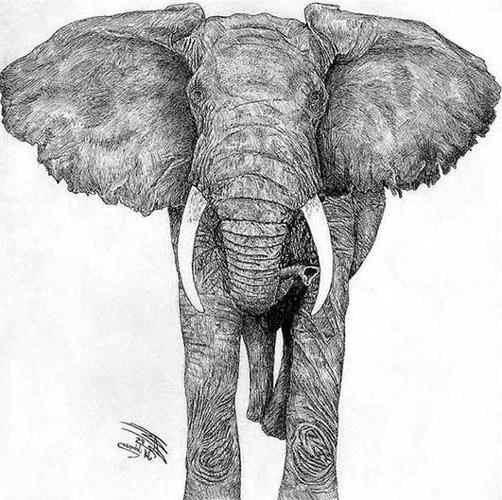

elephant -> lovely , rabbit , creature , beautiful , colored , jewel , red , shaped , dark , resembles , 


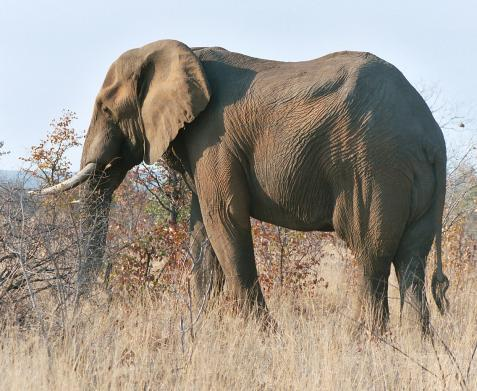

elephant -> horse , horses , sheep , cow , dog , animals , cat , herd , elephant , breeders , 


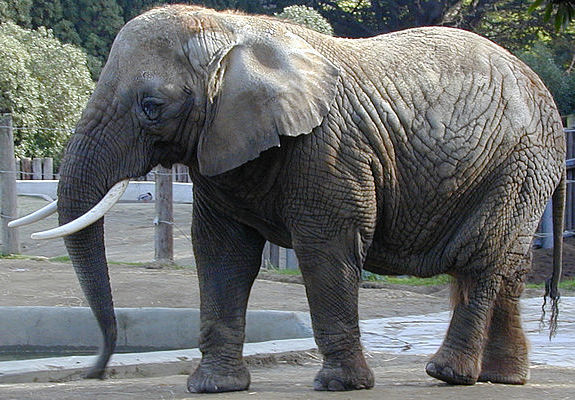

elephant -> horse , horses , sheep , cow , animals , dog , herd , thoroughbred , elephant , bred , 


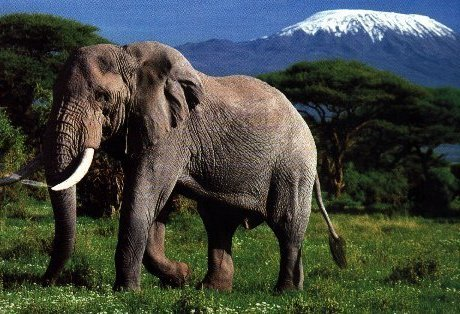

elephant -> horse , horses , cow , dog , sheep , thoroughbred , herd , riding , elephant , cat , 


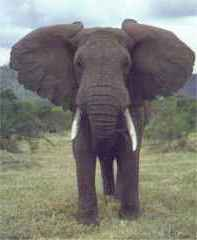

elephant -> horse , horses , cow , sheep , animals , herd , bird , pig , dog , elephant , 


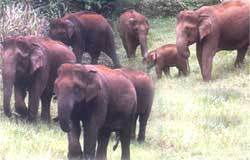

elephant -> horse , horses , cow , thoroughbred , sheep , herd , riding , bull , breeders , dog , 


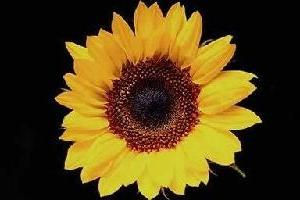

flower -> cactus , orchids , flower , butterflies , fern , tree , mushroom , shrub , ferns , pine , 


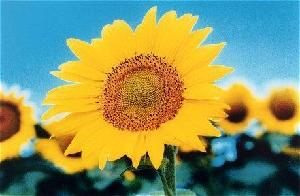

flower -> prickly , mushroom , mushrooms , tomato , vegetable , nut , carrot , onion , grape , flavored , 


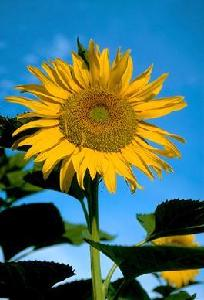

flower -> longhorn , melon , aquatics , carousel , pecan , redwoods , strawberries , squash , peaches , snapper , 


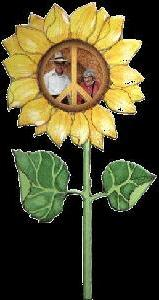

flower -> tortoise , pots , seagull , turnip , barbed-wire , dipper , p.o. , bluebonnet , skillet , crate , 


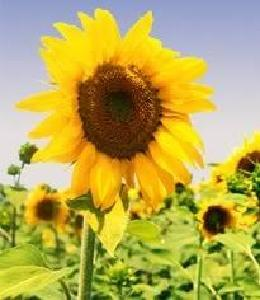

flower -> cactus , flower , tree , orchids , pine , edible , trees , fern , mushroom , shrub , 


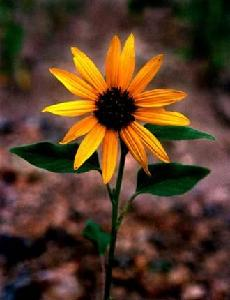

flower -> cactus , pear , pine , frog , rattlesnake , blossoms , palms , rainforest , roses , blooming , 


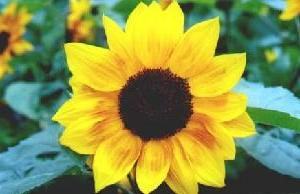

flower -> cactus , butterflies , orchids , flower , tree , fern , shrub , beetle , pine , mushroom , 


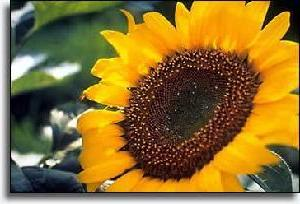

flower -> cactus , butterflies , orchids , flower , beetle , fern , tree , shrub , mushroom , ferns , 


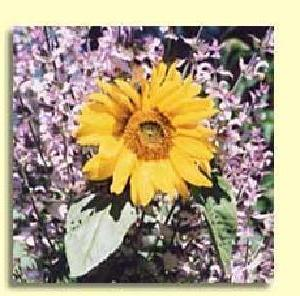

flower -> cactus , flower , orchids , tree , beetle , fruit , mushroom , butterflies , fern , mango , 


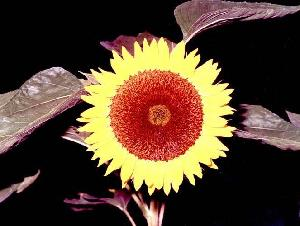

flower -> cactus , orchid , mushroom , flower , shrubs , squirrel , edible , mushrooms , tree , frog , 


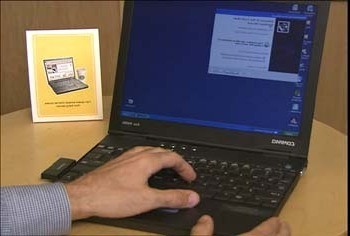

laptop -> screen , video , screens , cameras , camera , digital , commercials , phone , internet , computer , 


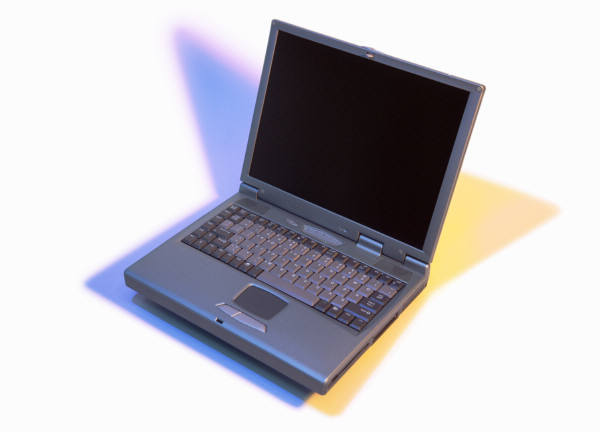

laptop -> screen , screens , camera , video , cameras , digital , phone , computer , computers , internet , 


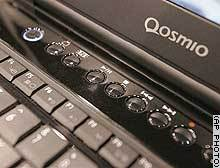

laptop -> beer , hot , blue , lights , pack , fruit , store , wheel , makes , onto , 


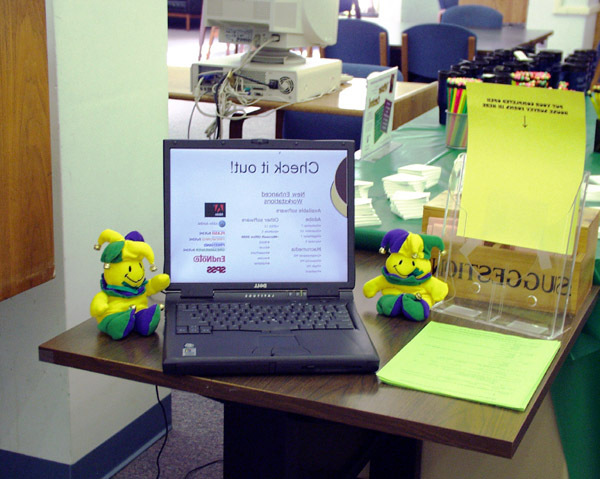

laptop -> internet , phone , web , regularly , online , advertisements , advertising , telephone , website , program , 


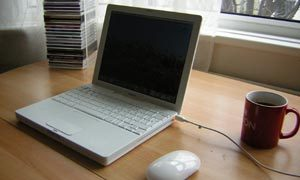

laptop -> screen , screens , cameras , video , camera , phone , computers , computer , digital , phones , 


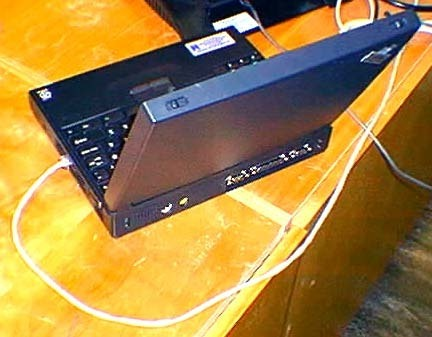

laptop -> bicycle , earth , clock , bike , giant , airplane , radar , spacecraft , screens , underwater , 


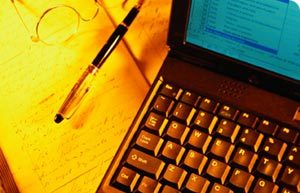

laptop -> dog , bird , cat , horse , animals , dogs , birds , wild , snake , pig , 


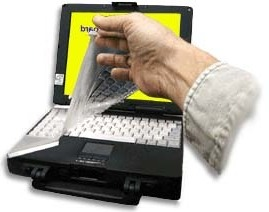

laptop -> tv , dog , video , show , cable , cartoon , live , boy , fox , espn , 


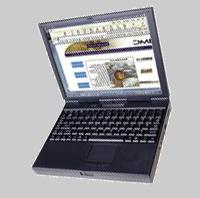

laptop -> watch , dog , lights , owners , viewing , devices , shown , appear , hot , spots , 


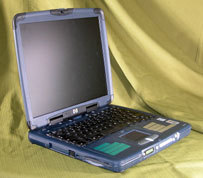

laptop -> shows , show , cable , internet , web , seen , live , networks , computer , every , 


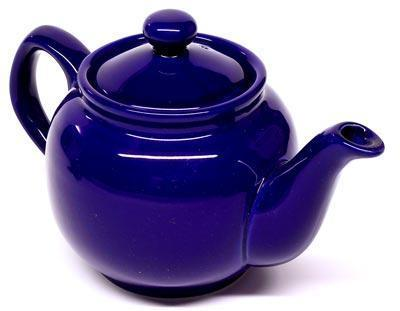

teapot -> beer , bottle , vodka , wine , coffee , chocolate , champagne , fruit , juice , bottled , 


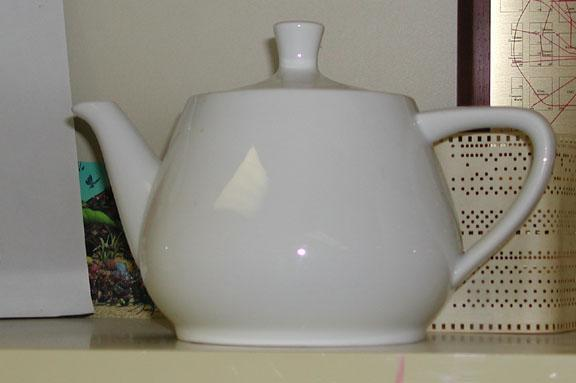

teapot -> beer , bottle , coffee , wine , vodka , champagne , bottled , juice , glass , chocolate , 


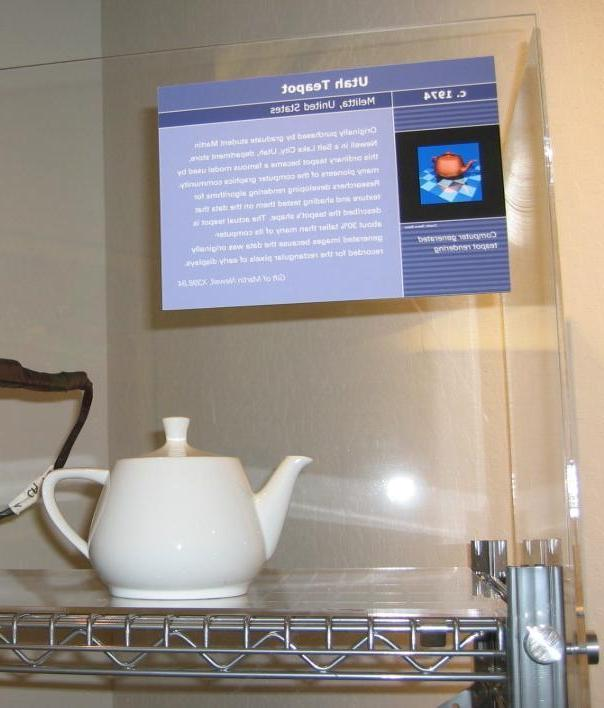

teapot -> bottle , bottles , table , chairs , beer , kitchen , room , bed , plastic , dinner , 


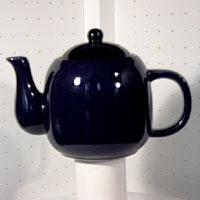

teapot -> bottle , bottles , drinks , glass , wine , bag , milk , plastic , fruit , chocolate , 


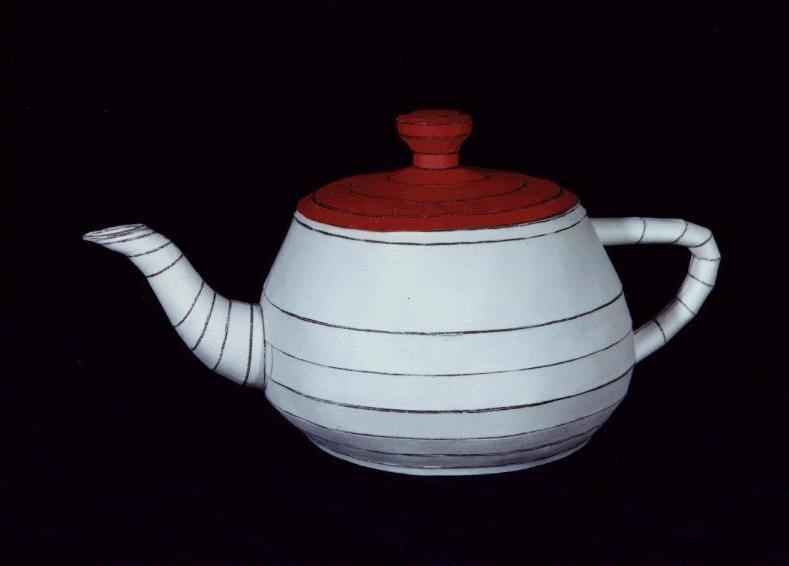

teapot -> bird , goat , fish , pig , birds , sheep , elephant , cow , chickens , pigs , 


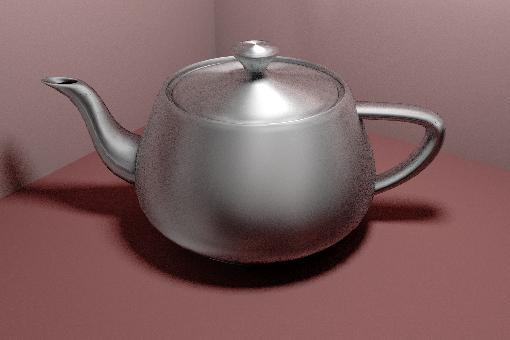

teapot -> beer , drink , bottle , drinks , milk , wine , coffee , drinking , champagne , candy , 


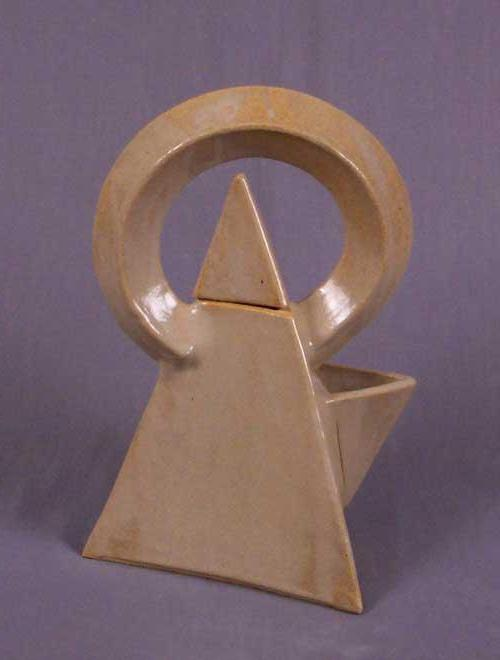

teapot -> shovel , dirt , wooden , sidewalk , donkey , bike , buckets , bicycle , wagon , squat , 


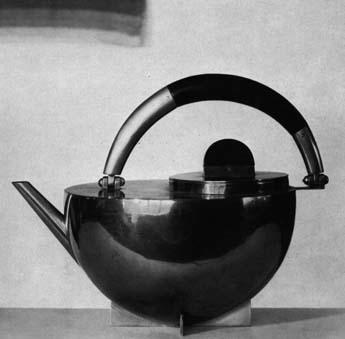

teapot -> goat , beer , bottle , cheese , bottles , cans , chicken , eaten , sausage , eat , 


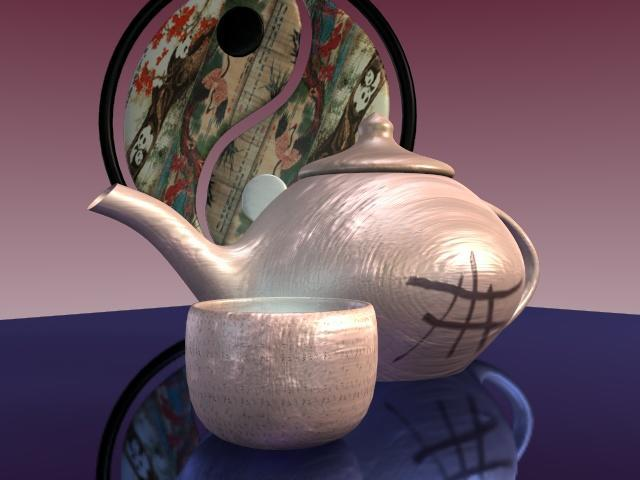

teapot -> tub , mushroom , striped , smoked , lobster , oysters , ox , camel , sofa , squirrel , 


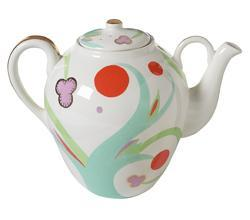

teapot -> beer , bottle , vodka , whiskey , wine , coffee , champagne , bottled , beers , chocolate , 


16

In [ ]:
generate_tags(t_y,t_y_pred)

### Computing flat hit K for unseen label images

In [ ]:
def t_flatk(y,y_pred):
  ans=0
  rem=0
  for i in range(len(y_pred)):
    tar=''
    for e in unseenLabelDataset_generator.class_indices:
      if(unseenLabelDataset_generator.class_indices[e]==y[i]):
        tar=e
        break;
    arr_tar=tar.split('_')
    distances = word_index.get_nns_by_vector(y_pred[i], 10, include_distances=True)
    for e in distances[0]:
      if (words_list[e] in arr_tar):
        ans=ans+1
  return ans

In [ ]:
print("Correctly predicted labels for",t_flatk(t_y,t_y_pred),"out of",t_y.shape[0],"unseen label images.")

Correctly predicted labels for 16 out of 50 unseen label images.


# **Thank you !!**

---